#                OasisInfobyte Data Science - Task 3
#CAR PRICE PREDICTING MODEL 

__VIKAS CHAUDHARY__



In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.000
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167
161,162,0,toyota corolla,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,28,34,8358.000
169,170,2,toyota starlet,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9989.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df[df["price"]>40000]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


In [7]:
df["carlength"].unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

In [8]:
df["horsepower"].unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288,  73,  82,  94,  62,  56, 112,  92, 161,
       156,  52,  85, 114, 162, 134, 106])

In [9]:
df["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

In [10]:
df["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [11]:
df["price"].unique()

array([13495.   , 16500.   , 13950.   , 17450.   , 15250.   , 17710.   ,
       18920.   , 23875.   , 17859.167, 16430.   , 16925.   , 20970.   ,
       21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,  5151.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6479.   ,
        6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  , 11048.   , 32250.   , 35550.   , 36000.   ,  5195.   ,
        6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   , 11845.   ,
       13645.   , 15645.   ,  8495.   , 10595.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       31600.   , 34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   , 

In [12]:
df["CarName"]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [13]:
import seaborn as sbn
import matplotlib.pyplot as plt

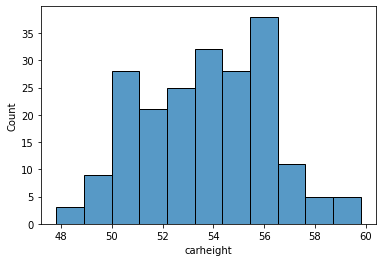

In [14]:
sbn.histplot(data=df, x='carheight')
plt.show()

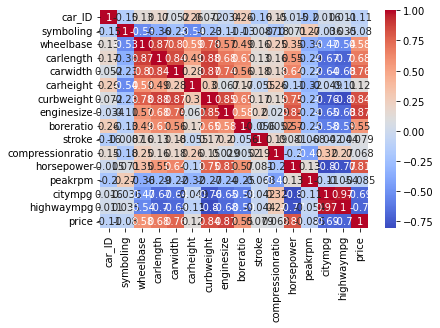

In [15]:
corr_matrix = df.corr()
sbn.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


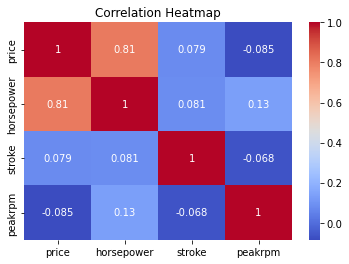

In [16]:
corr_matrix = df[["price","horsepower","stroke","peakrpm"]].corr()
sbn.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


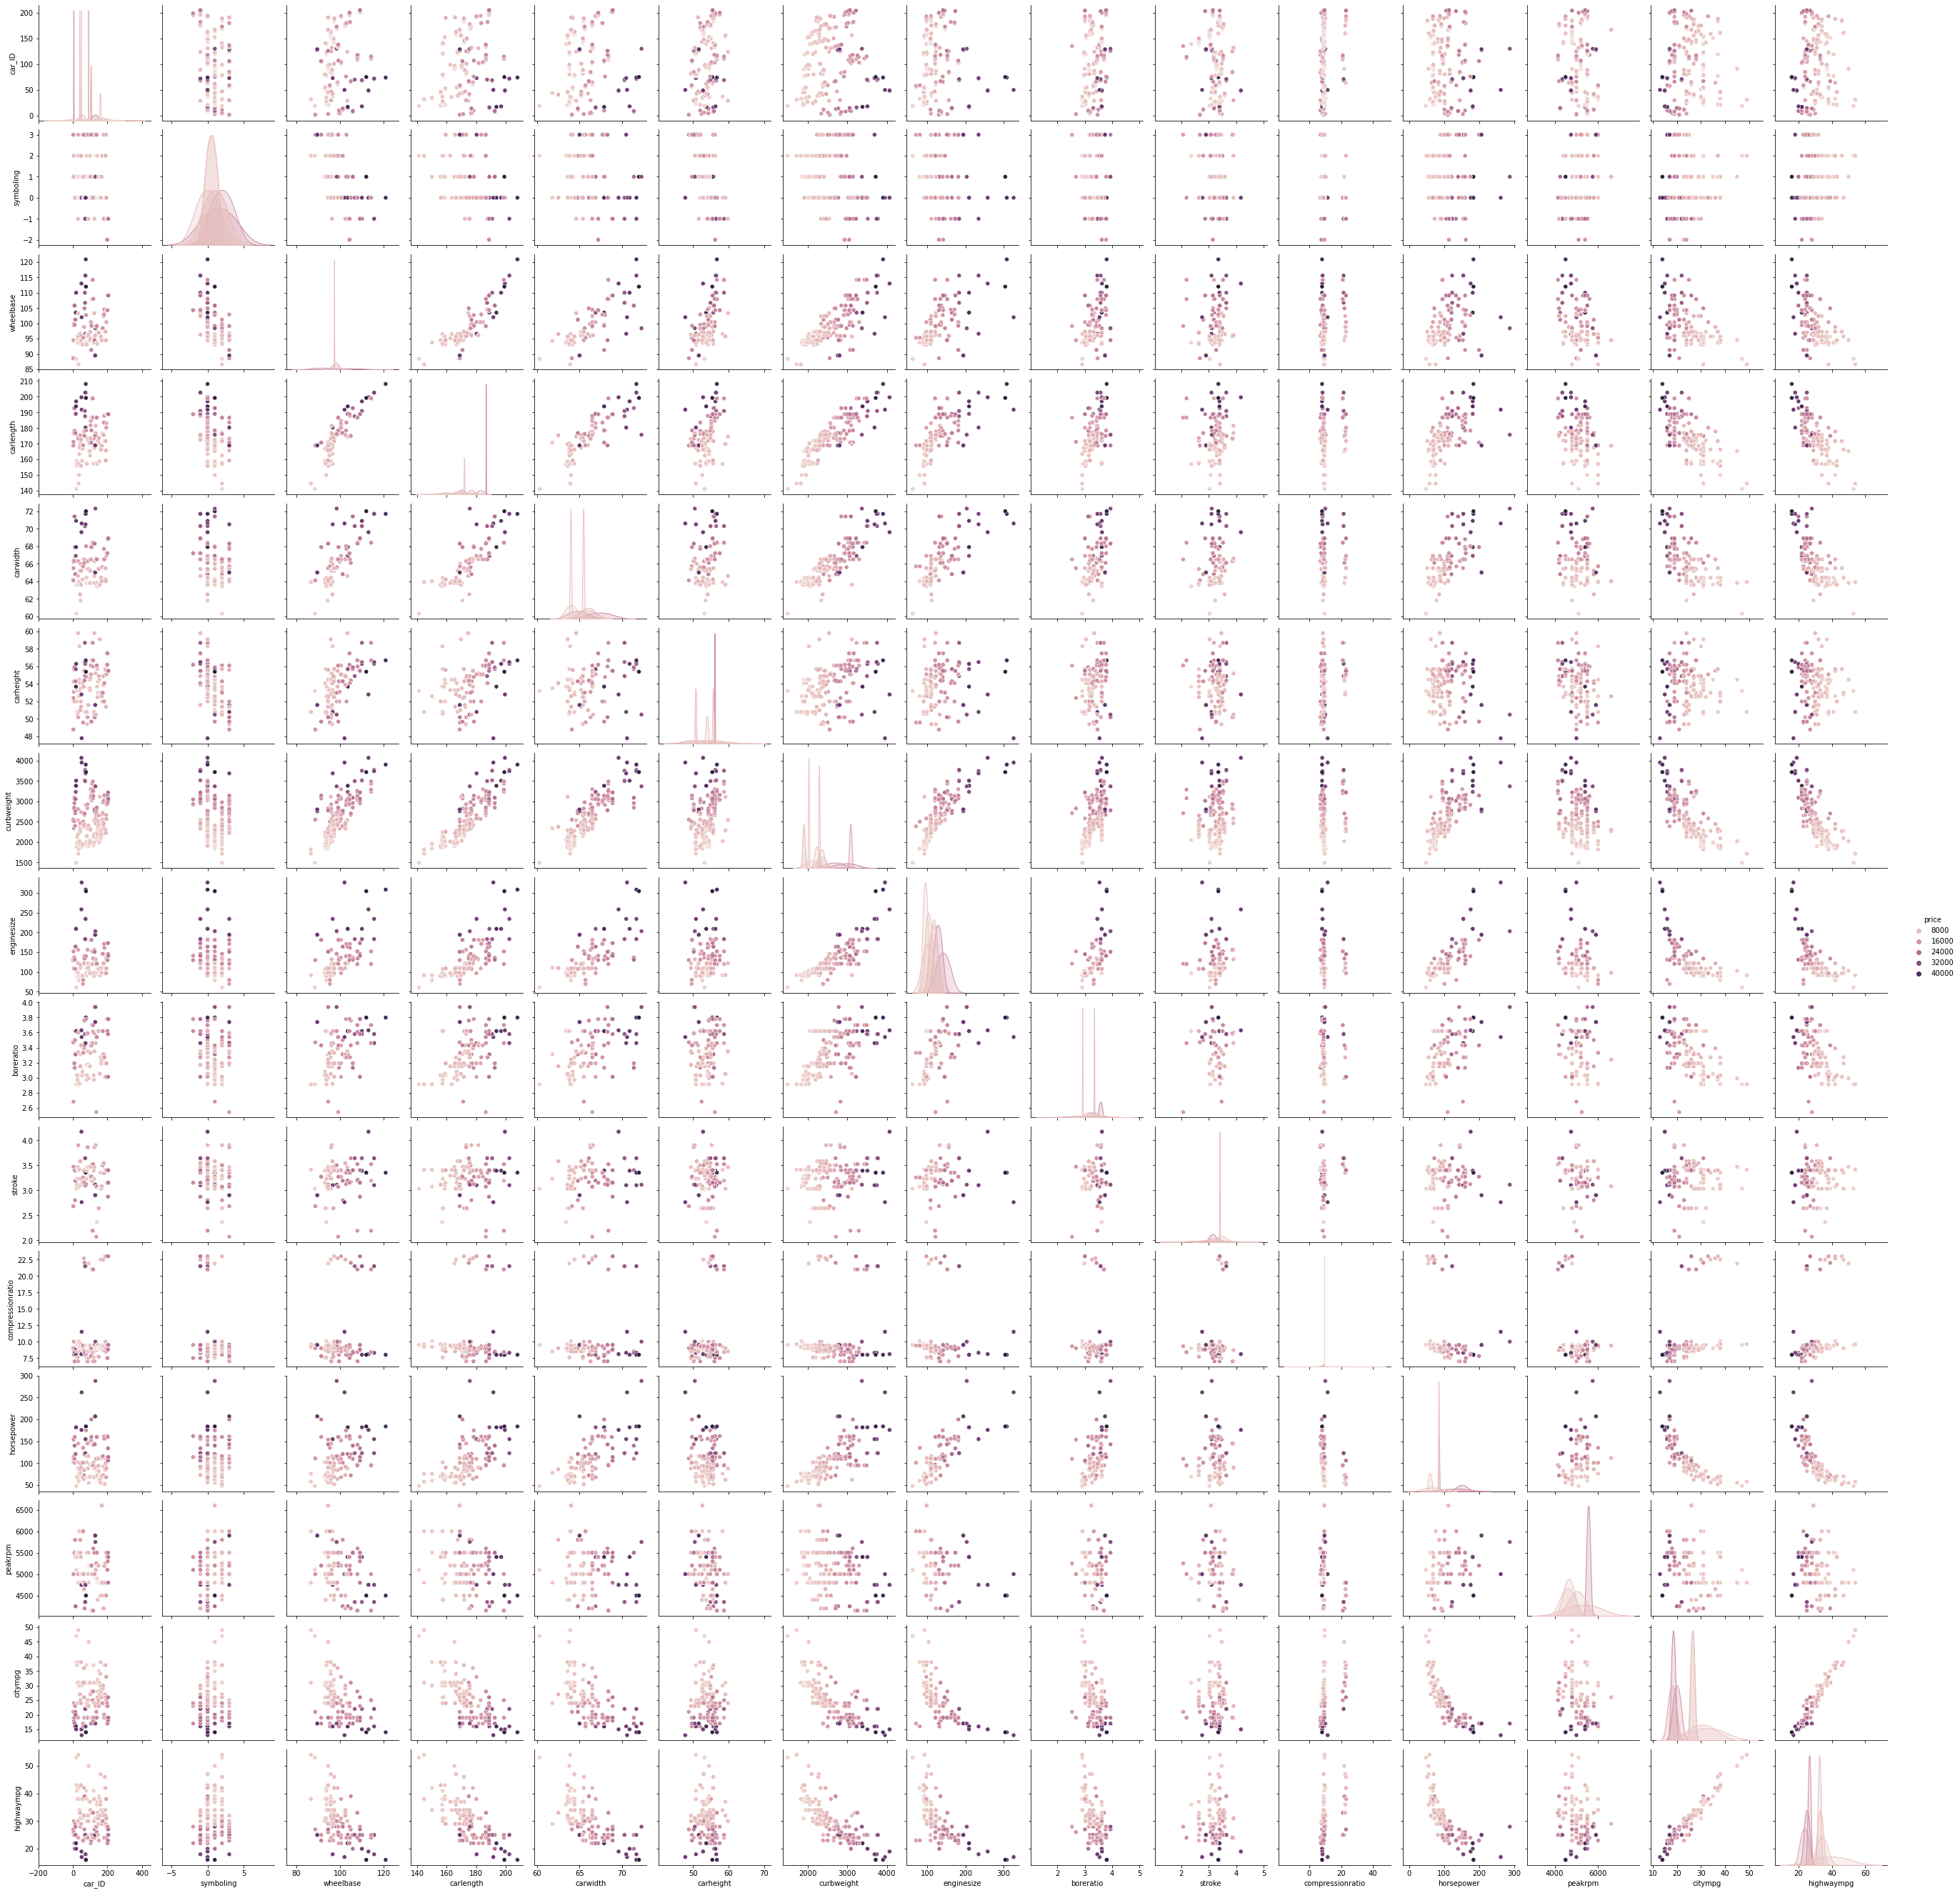

In [58]:
sbn.pairplot(data=df, hue="price")
plt.show()


In [18]:
x=df.drop(columns=["price","car_ID"])
y=df["price"]

In [19]:
x.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [20]:
y.head(5)

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
y_train.describe()

count      164.000000
mean     12751.954268
std       7204.916980
min       5118.000000
25%       7705.750000
50%      10093.500000
75%      16447.500000
max      37028.000000
Name: price, dtype: float64

# lmporting different models

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
model1=LinearRegression()

In [28]:
model2=RandomForestRegressor()

In [29]:
model3=GradientBoostingRegressor()

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
from sklearn.metrics import r2_score

In [32]:
ohe=OneHotEncoder()

In [33]:
categorical_columns=["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"]

In [34]:
ohe.fit(df[categorical_columns])

OneHotEncoder()

In [35]:
from sklearn.compose import make_column_transformer

## Making pipeline

In [36]:
from sklearn.pipeline import make_pipeline

In [37]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),categorical_columns),remainder="passthrough")

In [38]:
my_pipeline3=make_pipeline(column_trans,model3)

In [39]:
my_pipeline2=make_pipeline(column_trans,model3)

In [40]:
my_pipeline1=make_pipeline(column_trans,model3)

## Checking different models

## model 3 GradientBoostingRegressor model

In [41]:
my_pipeline3.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
       'alfa-romero stelvio', 'audi 100 ls', 'audi 100ls', 'audi 4000',
       'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 320i',
       'bmw x1', 'bmw x3', 'bmw x4', 'bmw x5', 'bmw z4',...
                                                                            array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
                                                                            array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype=object),
                                                                            array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype=object)]),
  

## checking at what random state the model 1 performs best

In [42]:
scores1=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    my_pipeline3.fit(x_train,y_train)
    y_pred=my_pipeline3.predict(x_test)
    scores1.append(r2_score(y_test,y_pred))

In [43]:
np.argmax(scores1)

76

In [44]:
scores1[np.argmax(scores1)]

0.9704227848752924

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=(np.argmax(scores1)))
lr=LinearRegression()
my_pipeline3=make_pipeline(column_trans,lr)
my_pipeline3.fit(x_train,y_train)
y_pred=my_pipeline3.predict(x_test)
r2_score(y_test,y_pred)


0.8383979022628307

## model 2--- RandomforestRegressor

In [46]:
my_pipeline2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
       'alfa-romero stelvio', 'audi 100 ls', 'audi 100ls', 'audi 4000',
       'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 320i',
       'bmw x1', 'bmw x3', 'bmw x4', 'bmw x5', 'bmw z4',...
                                                                            array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
                                                                            array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype=object),
                                                                            array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype=object)]),
  

### ckecking at what random sate the model performs best

In [47]:
scores2=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    y_pred=my_pipeline2.predict(x_test)
    scores2.append(r2_score(y_test,y_pred))

In [48]:
np.argmax(scores2)

94

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=77)
lr=LinearRegression()
my_pipeline2=make_pipeline(column_trans,lr)
my_pipeline2.fit(x_train,y_train)
y_pred=my_pipeline2.predict(x_test)
r2_score(y_test,y_pred)


0.40215608677414183

## model 1--- LinearRegressor  

In [50]:
my_pipeline1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
       'alfa-romero stelvio', 'audi 100 ls', 'audi 100ls', 'audi 4000',
       'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 320i',
       'bmw x1', 'bmw x3', 'bmw x4', 'bmw x5', 'bmw z4',...
                                                                            array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
                                                                            array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype=object),
                                                                            array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype=object)]),
  

### checking at what random state our model perform best 

In [51]:
scores3=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    y_pred=my_pipeline1.predict(x_test)
    scores3.append(r2_score(y_test,y_pred))

In [52]:
np.argmax(scores2)

94

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)
lr=LinearRegression()
my_pipeline2=make_pipeline(column_trans,lr)
my_pipeline2.fit(x_train,y_train)
y_pred=my_pipeline2.predict(x_test)
r2_score(y_test,y_pred)


0.7015325730871255

## FROM ABOVE RESULT WE CA SAY THAT OUR MODEL 3 THAT IS GradientBoostingRegressor MODEL IS PERFORMING BEST.

## SAMPLE OUTPUT

In [54]:
data = [[0,"bmw x1","gas","std","two","sedan","rwd","front",101.2,176.8,64.8,54.3,2710,"ohc","six",164,"mpfi",3.31,3.19,9,121,4250,21,28]]

columns = ["symboling","CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","wheelbase","carlength","carwidth","carheight","curbweight","enginetype","cylindernumber","enginesize","fuelsystem","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg"]

df1 = pd.DataFrame(data, columns=columns)


In [55]:
my_pipeline3.predict(df1)

array([20988.18255326])

THE ACTUAL PRICE IS 20970